In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("C:/My_Project/ML_Project/Intelligent_abnormal_electricity_usage_dataset_REALWORLD.csv")
df

,Meter_Id,Date,Region_Code,Dwelling_Type,Num_Occupants,House_Area (sqft),Appliance_Score,Connected_Load(kw),Temperature_C,Humidity (%),Expected_Energy(kwh),Actual_Energy(kwh),Usage_Deviation(%),Cluster_Avg_Energy(kwh),Abnormal_Usage
0,IN-KL-ELC-97400511,25-01-2023,IN_KL_TVM,Independent House,2,2458,6,7.21,29.52,83.53,12.82 kWh,19.886033739870022 kWh,55.12,16.89,1
1,IN-KL-ELC-28113115,04-01-2023,IN_KL_ALP,Independent House,3,2295,9,7.98,25.83,48.79,14.66 kWh,15.51 kWh,5.80,17.83,0
2,IN-KL-ELC-17499006,04-01-2023,IN_KL_TVM,Apartment,3,2424,16,5.47,31.91,46.66,16.67 kWh,15.11 kWh,-9.36,17.26,0
3,IN-KL-ELC-22187937,21-01-2023,IN_KL_ERN,Apartment,1,2787,18,5.41,21.15,58.49,12.71 kWh,21.26104008352499 kWh,67.28,16.61,1
4,IN-KL-ELC-57403818,28-01-2023,IN_KL_ERN,Independent House,4,2389,10,2.99,30.91,77.26,13.53 kWh,12.67 kWh,-6.36,16.43,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10795,IN-KL-ELC-11063908,05-01-2023,IN_KL_ALP,Apartment,4,1364,9,7.04,32.65,47.38,16.67 kWh,NaN,-5.82,16.47,1
10796,IN-KL-ELC-66129276,02-01-2023,IN_KL_ALP,Apartment,3,2673,21,6.26,25.62,48.69,17.33 kWh,23.56399654189783 kWh,35.97,16.47,1
10797,IN-KL-ELC-79975445,21-01-2023,IN_KL_ERN,Villa,5,2520,15,6.56,27.33,67.33,18.11 kWh,20.7 kWh,14.30,16.28,0
10798,IN-KL-ELC-90825900,21-01-2023,IN_KL_ALP,Independent House,3,2379,14,4.54,34.11,70.00,15.72 kWh,14.46 kWh,-8.02,17.83,0


In [81]:
df.shape

(10800, 15)

In [82]:
df.columns

Index(['Meter_Id', 'Date', 'Region_Code', 'Dwelling_Type', 'Num_Occupants',
       'House_Area (sqft)', 'Appliance_Score', 'Connected_Load(kw)',
       'Temperature_C', 'Humidity (%)', 'Expected_Energy(kwh)',
       'Actual_Energy(kwh)', 'Usage_Deviation(%)', 'Cluster_Avg_Energy(kwh)',
       'Abnormal_Usage'],
      dtype='object')

In [83]:
df.head()

,Meter_Id,Date,Region_Code,Dwelling_Type,Num_Occupants,House_Area (sqft),Appliance_Score,Connected_Load(kw),Temperature_C,Humidity (%),Expected_Energy(kwh),Actual_Energy(kwh),Usage_Deviation(%),Cluster_Avg_Energy(kwh),Abnormal_Usage
0,IN-KL-ELC-97400511,25-01-2023,IN_KL_TVM,Independent House,2,2458,6,7.21,29.52,83.53,12.82 kWh,19.886033739870022 kWh,55.12,16.89,1
1,IN-KL-ELC-28113115,04-01-2023,IN_KL_ALP,Independent House,3,2295,9,7.98,25.83,48.79,14.66 kWh,15.51 kWh,5.80,17.83,0
2,IN-KL-ELC-17499006,04-01-2023,IN_KL_TVM,Apartment,3,2424,16,5.47,31.91,46.66,16.67 kWh,15.11 kWh,-9.36,17.26,0
3,IN-KL-ELC-22187937,21-01-2023,IN_KL_ERN,Apartment,1,2787,18,5.41,21.15,58.49,12.71 kWh,21.26104008352499 kWh,67.28,16.61,1
4,IN-KL-ELC-57403818,28-01-2023,IN_KL_ERN,Independent House,4,2389,10,2.99,30.91,77.26,13.53 kWh,12.67 kWh,-6.36,16.43,0


In [84]:
df.tail()

,Meter_Id,Date,Region_Code,Dwelling_Type,Num_Occupants,House_Area (sqft),Appliance_Score,Connected_Load(kw),Temperature_C,Humidity (%),Expected_Energy(kwh),Actual_Energy(kwh),Usage_Deviation(%),Cluster_Avg_Energy(kwh),Abnormal_Usage
10795,IN-KL-ELC-11063908,05-01-2023,IN_KL_ALP,Apartment,4,1364,9,7.04,32.65,47.38,16.67 kWh,NaN,-5.82,16.47,1
10796,IN-KL-ELC-66129276,02-01-2023,IN_KL_ALP,Apartment,3,2673,21,6.26,25.62,48.69,17.33 kWh,23.56399654189783 kWh,35.97,16.47,1
10797,IN-KL-ELC-79975445,21-01-2023,IN_KL_ERN,Villa,5,2520,15,6.56,27.33,67.33,18.11 kWh,20.7 kWh,14.30,16.28,0
10798,IN-KL-ELC-90825900,21-01-2023,IN_KL_ALP,Independent House,3,2379,14,4.54,34.11,70.00,15.72 kWh,14.46 kWh,-8.02,17.83,0
10799,IN-KL-ELC-20063517,11-01-2023,IN_KL_TVM,Independent House,6,2560,21,4.08,25.73,73.94,18.91 kWh,19.02 kWh,0.58,16.89,0


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10800 entries, 0 to 10799
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Meter_Id                 10800 non-null  object 
 1   Date                     10800 non-null  object 
 2   Region_Code              10800 non-null  object 
 3   Dwelling_Type            10800 non-null  object 
 4   Num_Occupants            10800 non-null  int64  
 5   House_Area (sqft)        10800 non-null  int64  
 6   Appliance_Score          10800 non-null  int64  
 7   Connected_Load(kw)       10800 non-null  float64
 8   Temperature_C            10800 non-null  float64
 9   Humidity (%)             10800 non-null  float64
 10  Expected_Energy(kwh)     10133 non-null  object 
 11  Actual_Energy(kwh)       9900 non-null   object 
 12  Usage_Deviation(%)       10800 non-null  float64
 13  Cluster_Avg_Energy(kwh)  10800 non-null  float64
 14  Abnormal_Usage        

In [86]:
df.describe()

,Num_Occupants,House_Area (sqft),Appliance_Score,Connected_Load(kw),Temperature_C,Humidity (%),Usage_Deviation(%),Cluster_Avg_Energy(kwh),Abnormal_Usage
count,10800.000000,10800.000000,10800.000000,10800.000000,10800.000000,10800.000000,10800.000000,10800.000000,10800.000000
mean,3.527778,1673.255556,13.508333,5.314472,29.954353,64.754650,15.802278,16.775722,0.438796
std,1.701159,708.161742,4.731902,1.546343,3.992592,11.491137,26.914769,0.499606,0.496263
min,1.000000,450.000000,6.000000,2.510000,12.870000,45.000000,-37.240000,16.020000,0.000000
25%,2.000000,1003.250000,9.000000,3.920000,27.307500,54.777500,-2.492500,16.430000,0.000000
50%,4.000000,1775.500000,14.000000,5.335000,29.970000,64.525000,4.025000,16.610000,0.000000
75%,5.000000,2279.500000,18.000000,6.662500,32.650000,74.632500,33.000000,16.982500,1.000000
max,6.000000,2795.000000,21.000000,7.980000,45.250000,85.000000,134.610000,17.830000,1.000000


In [87]:
df.describe(include='O')

,Meter_Id,Date,Region_Code,Dwelling_Type,Expected_Energy(kwh),Actual_Energy(kwh)
count,10800,10800,10800,10800,10133,9900
unique,360,30,3,3,1424,4385
top,IN-KL-ELC-97400511,25-01-2023,IN_KL_ERN,Independent House,14.68 kWh,15.07 kWh
freq,30,360,4260,4650,24,17


In [88]:
df.duplicated().sum()

np.int64(0)

In [89]:
df.isna().sum()

Meter_Id                     0
Date                         0
Region_Code                  0
Dwelling_Type                0
Num_Occupants                0
House_Area (sqft)            0
Appliance_Score              0
Connected_Load(kw)           0
Temperature_C                0
Humidity (%)                 0
Expected_Energy(kwh)       667
Actual_Energy(kwh)         900
Usage_Deviation(%)           0
Cluster_Avg_Energy(kwh)      0
Abnormal_Usage               0
dtype: int64

In [90]:
df1=df['Abnormal_Usage'].value_counts()
df1

Abnormal_Usage
0    6061
1    4739
Name: count, dtype: int64

Text(0.5, 1.0, 'Abnormality_Usage_Count')

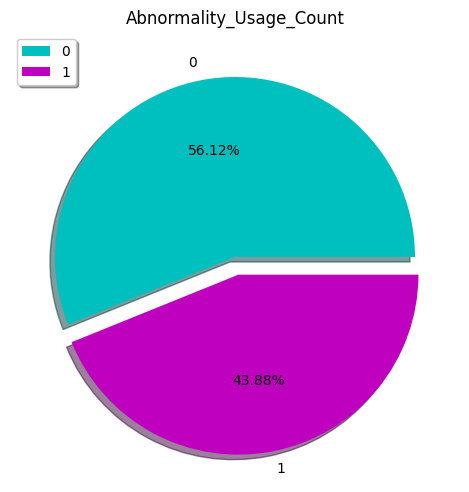

In [91]:
plt.pie(df1.values,labels=df1.index,explode=[0,0.1],autopct="%.2f%%",shadow=True,colors=['c','m'])
plt.legend(loc='upper left',shadow=True)
plt.tight_layout()
plt.title('Abnormality_Usage_Count')

In [92]:
df2=df['Dwelling_Type'].value_counts()
df2

Dwelling_Type
Independent House    4650
Apartment            4500
Villa                1650
Name: count, dtype: int64

Text(0.5, 1.0, 'Dwelling Types Chart')

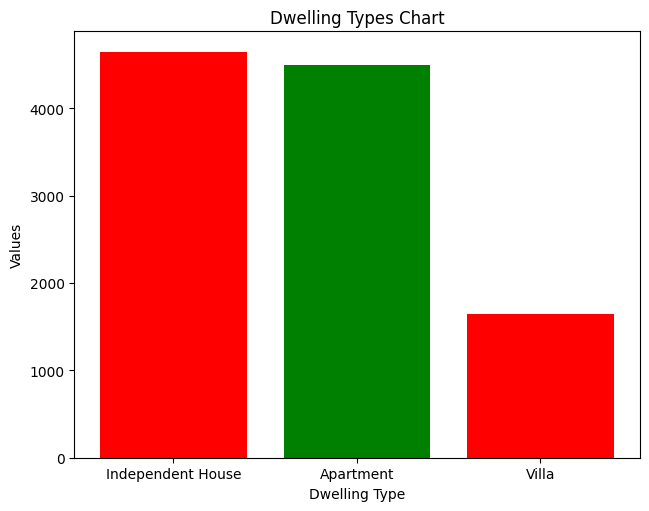

In [93]:
plt.bar(df2.index,df2.values,color=['r','g'])
plt.tight_layout()
plt.xlabel('Dwelling Type')
plt.ylabel('Values')
plt.title('Dwelling Types Chart')

In [94]:
df3=df["Num_Occupants"].value_counts()
df3

Num_Occupants
4    1950
6    1890
3    1830
2    1740
1    1740
5    1650
Name: count, dtype: int64

Text(0, 0.5, 'Count')

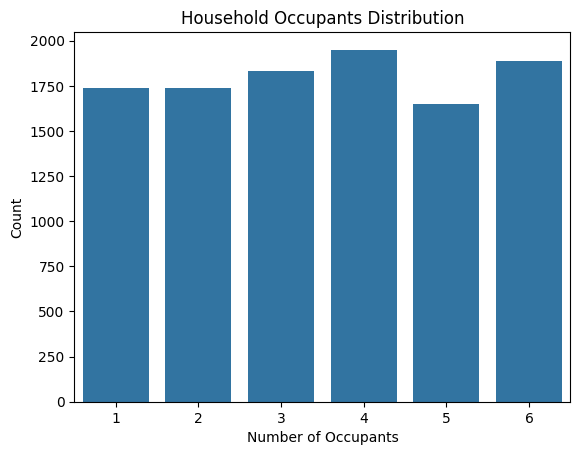

In [95]:
sns.countplot(x='Num_Occupants',data=df)
plt.title("Household Occupants Distribution")
plt.xlabel("Number of Occupants")
plt.ylabel("Count")

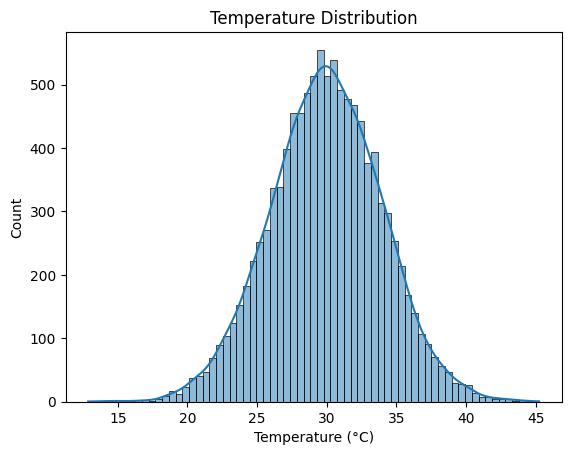

In [96]:
sns.histplot(x='Temperature_C',data=df,kde=True)
plt.title("Temperature Distribution")
plt.xlabel("Temperature (°C)")
plt.show()

In [97]:
df.groupby('Abnormal_Usage')['Appliance_Score'].mean()

Abnormal_Usage
0    13.916185
1    12.986706
Name: Appliance_Score, dtype: float64

Text(0, 0.5, 'Appliance Score')

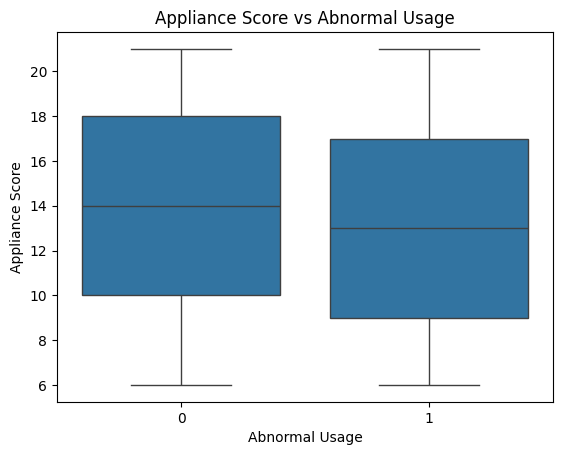

In [98]:
sns.boxplot(x="Abnormal_Usage", y="Appliance_Score", data=df)
plt.title("Appliance Score vs Abnormal Usage")
plt.xlabel("Abnormal Usage")
plt.ylabel("Appliance Score")

In [99]:
df['Temperature_C'].describe()

count    10800.000000
mean        29.954353
std          3.992592
min         12.870000
25%         27.307500
50%         29.970000
75%         32.650000
max         45.250000
Name: Temperature_C, dtype: float64

In [100]:
df.groupby('Abnormal_Usage')['Temperature_C'].mean()

Abnormal_Usage
0    30.016652
1    29.874674
Name: Temperature_C, dtype: float64

Text(0, 0.5, 'Temperature (°C)')

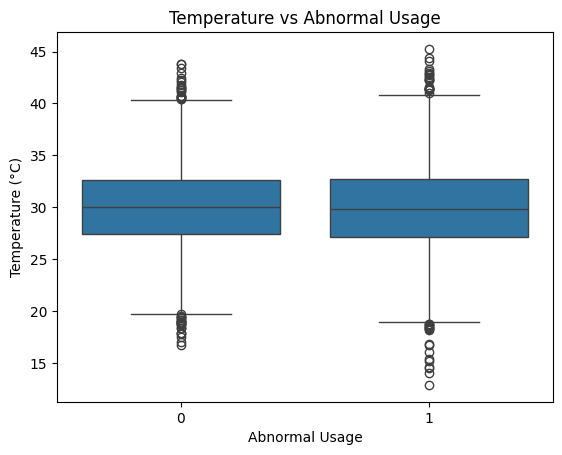

In [101]:
sns.boxplot(x='Abnormal_Usage',y='Temperature_C',data=df)
plt.title("Temperature vs Abnormal Usage")
plt.xlabel("Abnormal Usage")
plt.ylabel("Temperature (°C)")

In [102]:
df.groupby("Abnormal_Usage")["Num_Occupants"].mean()

Abnormal_Usage
0    3.684541
1    3.327284
Name: Num_Occupants, dtype: float64

Abnormal usage happens more often when fewer people are present

<Axes: xlabel='Abnormal_Usage', ylabel='Num_Occupants'>

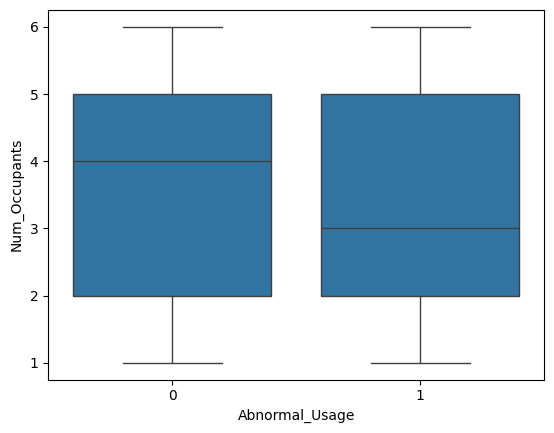

In [103]:
sns.boxplot(x='Abnormal_Usage',y='Num_Occupants',data=df)

In [104]:
df['Region_Code'].unique()

array(['IN_KL_TVM', 'IN_KL_ALP', 'IN_KL_ERN'], dtype=object)

<Axes: xlabel='Region_Code', ylabel='count'>

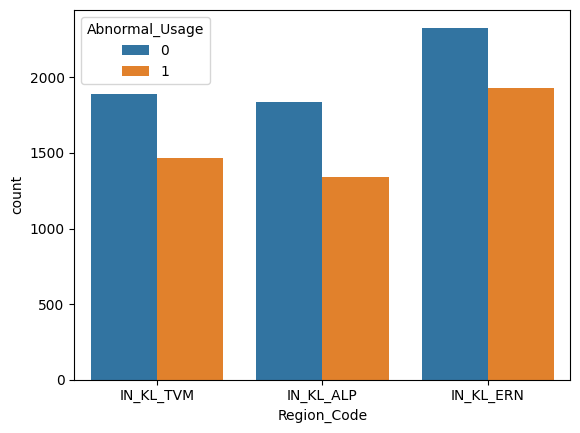

In [105]:
sns.countplot(x='Region_Code',hue='Abnormal_Usage',data=df)

In [106]:
df

,Meter_Id,Date,Region_Code,Dwelling_Type,Num_Occupants,House_Area (sqft),Appliance_Score,Connected_Load(kw),Temperature_C,Humidity (%),Expected_Energy(kwh),Actual_Energy(kwh),Usage_Deviation(%),Cluster_Avg_Energy(kwh),Abnormal_Usage
0,IN-KL-ELC-97400511,25-01-2023,IN_KL_TVM,Independent House,2,2458,6,7.21,29.52,83.53,12.82 kWh,19.886033739870022 kWh,55.12,16.89,1
1,IN-KL-ELC-28113115,04-01-2023,IN_KL_ALP,Independent House,3,2295,9,7.98,25.83,48.79,14.66 kWh,15.51 kWh,5.80,17.83,0
2,IN-KL-ELC-17499006,04-01-2023,IN_KL_TVM,Apartment,3,2424,16,5.47,31.91,46.66,16.67 kWh,15.11 kWh,-9.36,17.26,0
3,IN-KL-ELC-22187937,21-01-2023,IN_KL_ERN,Apartment,1,2787,18,5.41,21.15,58.49,12.71 kWh,21.26104008352499 kWh,67.28,16.61,1
4,IN-KL-ELC-57403818,28-01-2023,IN_KL_ERN,Independent House,4,2389,10,2.99,30.91,77.26,13.53 kWh,12.67 kWh,-6.36,16.43,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10795,IN-KL-ELC-11063908,05-01-2023,IN_KL_ALP,Apartment,4,1364,9,7.04,32.65,47.38,16.67 kWh,NaN,-5.82,16.47,1
10796,IN-KL-ELC-66129276,02-01-2023,IN_KL_ALP,Apartment,3,2673,21,6.26,25.62,48.69,17.33 kWh,23.56399654189783 kWh,35.97,16.47,1
10797,IN-KL-ELC-79975445,21-01-2023,IN_KL_ERN,Villa,5,2520,15,6.56,27.33,67.33,18.11 kWh,20.7 kWh,14.30,16.28,0
10798,IN-KL-ELC-90825900,21-01-2023,IN_KL_ALP,Independent House,3,2379,14,4.54,34.11,70.00,15.72 kWh,14.46 kWh,-8.02,17.83,0


In [107]:
df['Expected_Energy(kwh)'].dtypes

dtype('O')

In [108]:
df['Actual_Energy(kwh)'].dtypes

dtype('O')

In [109]:
df['Expected_Energy(kwh)']=df['Expected_Energy(kwh)'].str.replace('kWh','',regex=False)
df['Actual_Energy(kwh)']=df['Actual_Energy(kwh)'].str.replace('kWh','',regex=False)

In [110]:
df.dtypes

Meter_Id                    object
Date                        object
Region_Code                 object
Dwelling_Type               object
Num_Occupants                int64
House_Area (sqft)            int64
Appliance_Score              int64
Connected_Load(kw)         float64
Temperature_C              float64
Humidity (%)               float64
Expected_Energy(kwh)        object
Actual_Energy(kwh)          object
Usage_Deviation(%)         float64
Cluster_Avg_Energy(kwh)    float64
Abnormal_Usage               int64
dtype: object

In [111]:
df.isna().sum()

Meter_Id                     0
Date                         0
Region_Code                  0
Dwelling_Type                0
Num_Occupants                0
House_Area (sqft)            0
Appliance_Score              0
Connected_Load(kw)           0
Temperature_C                0
Humidity (%)                 0
Expected_Energy(kwh)       667
Actual_Energy(kwh)         900
Usage_Deviation(%)           0
Cluster_Avg_Energy(kwh)      0
Abnormal_Usage               0
dtype: int64

In [112]:
df['Expected_Energy(kwh)']=df['Expected_Energy(kwh)'].str.replace('null','0')
df['Actual_Energy(kwh)']=df['Actual_Energy(kwh)'].str.replace('null','0')

In [113]:
df['Expected_Energy(kwh)']=df['Expected_Energy(kwh)'].astype(float)
df['Actual_Energy(kwh)']=df['Actual_Energy(kwh)'].astype(float)

In [114]:
df.loc[df['Expected_Energy(kwh)']==0,'Expected_Energy(kwh)']=np.nan
df.loc[df['Actual_Energy(kwh)']==0,'Actual_Energy(kwh)']=np.nan

In [115]:
df.isna().sum()

Meter_Id                     0
Date                         0
Region_Code                  0
Dwelling_Type                0
Num_Occupants                0
House_Area (sqft)            0
Appliance_Score              0
Connected_Load(kw)           0
Temperature_C                0
Humidity (%)                 0
Expected_Energy(kwh)       667
Actual_Energy(kwh)         900
Usage_Deviation(%)           0
Cluster_Avg_Energy(kwh)      0
Abnormal_Usage               0
dtype: int64

In [116]:
df['Expected_Energy(kwh)'].unique()

array([12.82, 14.66, 16.67, ..., 23.42, 10.02, 23.18], shape=(1425,))

In [117]:
df['Actual_Energy(kwh)'].unique()

array([19.88603374, 15.51      , 15.11      , ..., 19.04538265,
       23.35445072, 23.56399654], shape=(4386,))

In [118]:
df['Expected_Energy(kwh)']=round(df['Expected_Energy(kwh)'].fillna(df['Expected_Energy(kwh)'].mean()),2)
df['Actual_Energy(kwh)']=round(df['Actual_Energy(kwh)'].fillna(df['Actual_Energy(kwh)'].mean()),2)

In [119]:
df.isna().sum()

Meter_Id                   0
Date                       0
Region_Code                0
Dwelling_Type              0
Num_Occupants              0
House_Area (sqft)          0
Appliance_Score            0
Connected_Load(kw)         0
Temperature_C              0
Humidity (%)               0
Expected_Energy(kwh)       0
Actual_Energy(kwh)         0
Usage_Deviation(%)         0
Cluster_Avg_Energy(kwh)    0
Abnormal_Usage             0
dtype: int64

In [120]:
df.dtypes

Meter_Id                    object
Date                        object
Region_Code                 object
Dwelling_Type               object
Num_Occupants                int64
House_Area (sqft)            int64
Appliance_Score              int64
Connected_Load(kw)         float64
Temperature_C              float64
Humidity (%)               float64
Expected_Energy(kwh)       float64
Actual_Energy(kwh)         float64
Usage_Deviation(%)         float64
Cluster_Avg_Energy(kwh)    float64
Abnormal_Usage               int64
dtype: object

In [121]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['Region_Code']=encoder.fit_transform(df['Region_Code'])
df['Dwelling_Type']=encoder.fit_transform(df['Dwelling_Type'])

In [122]:
df

,Meter_Id,Date,Region_Code,Dwelling_Type,Num_Occupants,House_Area (sqft),Appliance_Score,Connected_Load(kw),Temperature_C,Humidity (%),Expected_Energy(kwh),Actual_Energy(kwh),Usage_Deviation(%),Cluster_Avg_Energy(kwh),Abnormal_Usage
0,IN-KL-ELC-97400511,25-01-2023,2,1,2,2458,6,7.21,29.52,83.53,12.82,19.89,55.12,16.89,1
1,IN-KL-ELC-28113115,04-01-2023,0,1,3,2295,9,7.98,25.83,48.79,14.66,15.51,5.80,17.83,0
2,IN-KL-ELC-17499006,04-01-2023,2,0,3,2424,16,5.47,31.91,46.66,16.67,15.11,-9.36,17.26,0
3,IN-KL-ELC-22187937,21-01-2023,1,0,1,2787,18,5.41,21.15,58.49,12.71,21.26,67.28,16.61,1
4,IN-KL-ELC-57403818,28-01-2023,1,1,4,2389,10,2.99,30.91,77.26,13.53,12.67,-6.36,16.43,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10795,IN-KL-ELC-11063908,05-01-2023,0,0,4,1364,9,7.04,32.65,47.38,16.67,18.30,-5.82,16.47,1
10796,IN-KL-ELC-66129276,02-01-2023,0,0,3,2673,21,6.26,25.62,48.69,17.33,23.56,35.97,16.47,1
10797,IN-KL-ELC-79975445,21-01-2023,1,2,5,2520,15,6.56,27.33,67.33,18.11,20.70,14.30,16.28,0
10798,IN-KL-ELC-90825900,21-01-2023,0,1,3,2379,14,4.54,34.11,70.00,15.72,14.46,-8.02,17.83,0


In [123]:
df.dtypes

Meter_Id                    object
Date                        object
Region_Code                  int64
Dwelling_Type                int64
Num_Occupants                int64
House_Area (sqft)            int64
Appliance_Score              int64
Connected_Load(kw)         float64
Temperature_C              float64
Humidity (%)               float64
Expected_Energy(kwh)       float64
Actual_Energy(kwh)         float64
Usage_Deviation(%)         float64
Cluster_Avg_Energy(kwh)    float64
Abnormal_Usage               int64
dtype: object

In [124]:
df["Deviation_Abs"]=abs(df['Actual_Energy(kwh)']-df['Expected_Energy(kwh)'])

In [125]:
df["Usage_Ratio"]=df['Actual_Energy(kwh)']/df['Expected_Energy(kwh)']

In [126]:
df["Load_Utilization"]=df['Actual_Energy(kwh)']/df['Expected_Energy(kwh)']

In [127]:
df.drop(["Meter_Id", "Date","Expected_Energy(kwh)","Actual_Energy(kwh)","Usage_Deviation(%)","Cluster_Avg_Energy(kwh)"],axis=1,inplace=True)

In [128]:
df

,Region_Code,Dwelling_Type,Num_Occupants,House_Area (sqft),Appliance_Score,Connected_Load(kw),Temperature_C,Humidity (%),Abnormal_Usage,Deviation_Abs,Usage_Ratio,Load_Utilization
0,2,1,2,2458,6,7.21,29.52,83.53,1,7.07,1.551482,1.551482
1,0,1,3,2295,9,7.98,25.83,48.79,0,0.85,1.057981,1.057981
2,2,0,3,2424,16,5.47,31.91,46.66,0,1.56,0.906419,0.906419
3,1,0,1,2787,18,5.41,21.15,58.49,1,8.55,1.672699,1.672699
4,1,1,4,2389,10,2.99,30.91,77.26,0,0.86,0.936438,0.936438
...,...,...,...,...,...,...,...,...,...,...,...,...
10795,0,0,4,1364,9,7.04,32.65,47.38,1,1.63,1.097780,1.097780
10796,0,0,3,2673,21,6.26,25.62,48.69,1,6.23,1.359492,1.359492
10797,1,2,5,2520,15,6.56,27.33,67.33,0,2.59,1.143015,1.143015
10798,0,1,3,2379,14,4.54,34.11,70.00,0,1.26,0.919847,0.919847


In [129]:
x=df.drop(['Abnormal_Usage'],axis=1)
y=df['Abnormal_Usage']

In [130]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42,stratify=y)
x_train

,Region_Code,Dwelling_Type,Num_Occupants,House_Area (sqft),Appliance_Score,Connected_Load(kw),Temperature_C,Humidity (%),Deviation_Abs,Usage_Ratio,Load_Utilization
1035,1,0,6,1997,6,4.61,25.27,79.10,11.34,1.794674,1.794674
1482,0,1,3,2295,9,7.98,41.59,83.73,0.21,0.988556,0.988556
107,1,1,4,833,6,4.72,24.38,74.74,1.13,1.093234,1.093234
3655,0,1,3,2295,9,7.98,26.95,77.65,0.40,0.973190,0.973190
10139,0,1,5,2365,21,5.35,28.76,76.36,1.39,0.929406,0.929406
...,...,...,...,...,...,...,...,...,...,...,...
153,1,2,5,2073,12,4.88,25.69,75.68,2.52,1.162686,1.162686
3879,1,1,5,1054,8,4.03,31.25,46.88,1.74,0.882353,0.882353
3996,1,0,2,1840,6,4.40,35.24,52.85,0.33,1.028326,1.028326
10295,2,1,6,2362,15,3.45,30.02,71.43,1.39,0.921202,0.921202


In [131]:
x_test

,Region_Code,Dwelling_Type,Num_Occupants,House_Area (sqft),Appliance_Score,Connected_Load(kw),Temperature_C,Humidity (%),Deviation_Abs,Usage_Ratio,Load_Utilization
3595,2,0,3,1883,15,3.08,33.35,59.15,0.46,0.968856,0.968856
4933,2,1,3,2777,7,5.09,32.41,58.54,4.46,1.337113,1.337113
6456,2,0,3,1634,10,6.35,25.15,50.48,12.35,1.902118,1.902118
540,1,2,2,2588,18,4.43,30.60,53.47,2.26,1.149077,1.149077
867,1,2,1,606,21,6.07,28.35,56.45,0.20,1.012658,1.012658
...,...,...,...,...,...,...,...,...,...,...,...
10190,1,1,6,1543,15,5.27,35.13,76.85,0.83,1.040567,1.040567
1080,1,0,5,2546,17,7.11,32.95,51.48,0.65,0.968855,0.968855
823,2,1,1,490,12,6.27,27.73,62.70,5.55,1.435294,1.435294
5231,1,2,5,2552,12,4.45,20.01,61.37,0.61,1.044203,1.044203


In [132]:
y_train

1035     1
1482     0
107      0
3655     0
10139    1
        ..
153      0
3879     0
3996     0
10295    0
7752     0
Name: Abnormal_Usage, Length: 8640, dtype: int64

In [133]:
y_test

3595     0
4933     1
6456     1
540      0
867      0
        ..
10190    0
1080     0
823      1
5231     0
9954     0
Name: Abnormal_Usage, Length: 2160, dtype: int64

In [134]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(x_train)
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)
x_train

array([[0.5       , 0.        , 1.        , ..., 0.43216463, 0.60484699,
        0.60484699],
       [0.        , 0.5       , 0.4       , ..., 0.00800305, 0.23705407,
        0.23705407],
       [0.5       , 0.5       , 0.6       , ..., 0.04306402, 0.28481381,
        0.28481381],
       ...,
       [0.5       , 0.        , 0.2       , ..., 0.01257622, 0.25519935,
        0.25519935],
       [1.        , 0.5       , 1.        , ..., 0.05297256, 0.20632367,
        0.20632367],
       [0.5       , 0.5       , 0.4       , ..., 0.04992378, 0.20444701,
        0.20444701]], shape=(8640, 11))

In [135]:
x_test

array([[1.        , 0.        , 0.4       , ..., 0.02327935, 0.24780585,
        0.24780585],
       [1.        , 0.5       , 0.4       , ..., 0.2257085 , 0.44673846,
        0.44673846],
       [1.        , 0.        , 0.4       , ..., 0.625     , 0.75195496,
        0.75195496],
       ...,
       [1.        , 0.5       , 0.        , ..., 0.28087045, 0.49977618,
        0.49977618],
       [0.5       , 1.        , 0.8       , ..., 0.03087045, 0.28850841,
        0.28850841],
       [1.        , 0.5       , 0.2       , ..., 0.01366397, 0.25352151,
        0.25352151]], shape=(2160, 11))

In [136]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(x_train,y_train)
y_pred=LR.predict(x_test)
y_pred

array([0, 1, 1, ..., 1, 0, 0], shape=(2160,))

In [137]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,accuracy_score,classification_report
cm=confusion_matrix(y_test,y_pred)
cm

array([[1105,  107],
       [ 221,  727]])

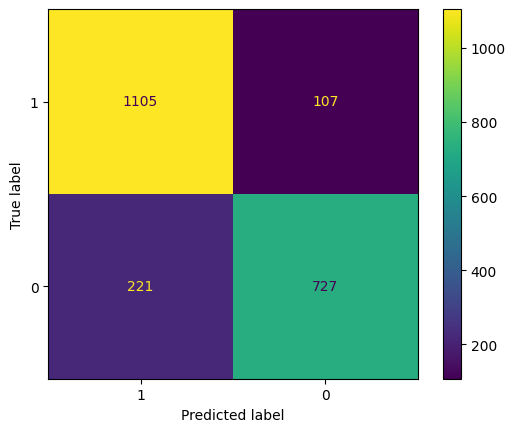

In [138]:
lab=[1,0]
cmd=ConfusionMatrixDisplay(cm,display_labels=lab)
cmd.plot()

In [139]:
score=accuracy_score(y_test,y_pred)*100
score

84.81481481481481

In [140]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)
y_pred_knn

array([0, 0, 1, ..., 1, 0, 0], shape=(2160,))

In [141]:
cm1=confusion_matrix(y_test,y_pred_knn)
cm1

array([[1123,   89],
       [ 207,  741]])

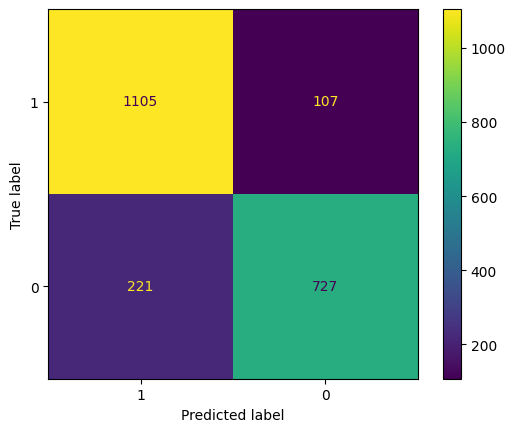

In [142]:
lab1=[1,0]
cmd1=ConfusionMatrixDisplay(cm,display_labels=lab1)
cmd1.plot()

In [143]:
score1=accuracy_score(y_test,y_pred_knn)*100
score1

86.29629629629629

In [144]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(
    max_depth=6,
    class_weight="balanced",
    random_state=42
)
dt.fit(x_train, y_train)

y_pred_dt = dt.predict(x_test)
y_pred_dt


array([0, 1, 1, ..., 1, 0, 0], shape=(2160,))

In [145]:
cm2=confusion_matrix(y_test,y_pred_dt)
cm2

array([[1087,  125],
       [ 176,  772]])

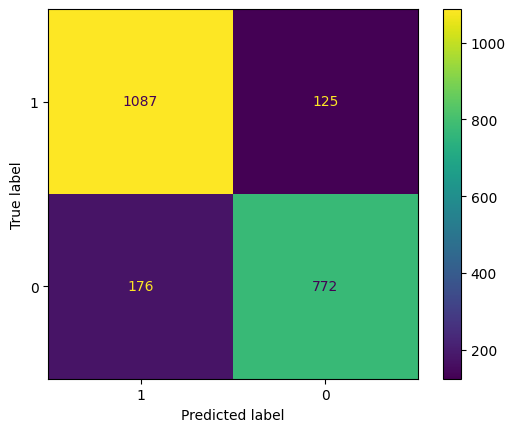

In [146]:
lab2=[1,0]
cmd2=ConfusionMatrixDisplay(cm2,display_labels=lab2)
cmd2.plot()

In [147]:
score2=accuracy_score(y_test,y_pred_dt)*100
score2

86.06481481481481

In [148]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
y_pred_rf


array([0, 1, 1, ..., 1, 0, 0], shape=(2160,))

In [149]:
cm3=confusion_matrix(y_test,y_pred_rf)
cm3

array([[1096,  116],
       [ 146,  802]])

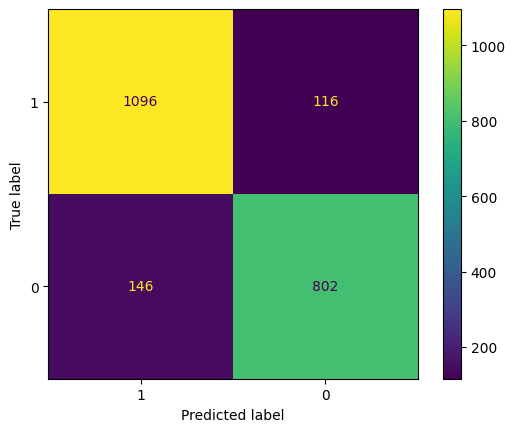

In [150]:
lab3=[1,0]
cmd3=ConfusionMatrixDisplay(cm3,display_labels=lab3)
cmd3.plot()


In [151]:
score3=accuracy_score(y_test,y_pred_rf)*100
score3

87.87037037037037

In [152]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf', C=0.1)
svm.fit(x_train, y_train)
y_pred_svm = svm.predict(x_test)
y_pred_svm


array([0, 1, 1, ..., 1, 0, 0], shape=(2160,))

In [153]:
cm4=confusion_matrix(y_test,y_pred_svm)
cm4

array([[1165,   47],
       [ 220,  728]])

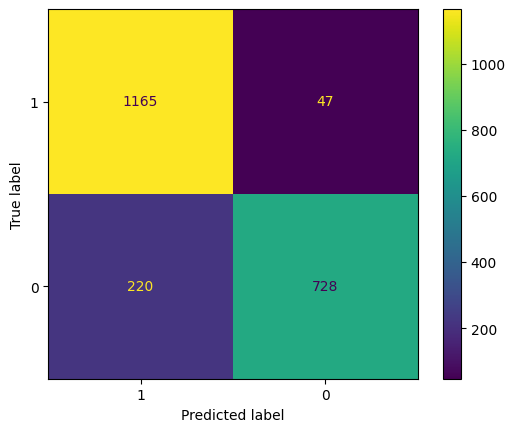

In [154]:
lab4=[1,0]
cmd4=ConfusionMatrixDisplay(cm4,display_labels=lab4)
cmd4.plot()

In [155]:
score4=accuracy_score(y_test,y_pred_svm)*100
score4

87.63888888888889

In [156]:
data={
    "model":['Logistic_Regression','KNN','DecisionTree','RandomForest','SVM'],
    "score":[score,score1,score2,score3,score4]
}

<BarContainer object of 5 artists>

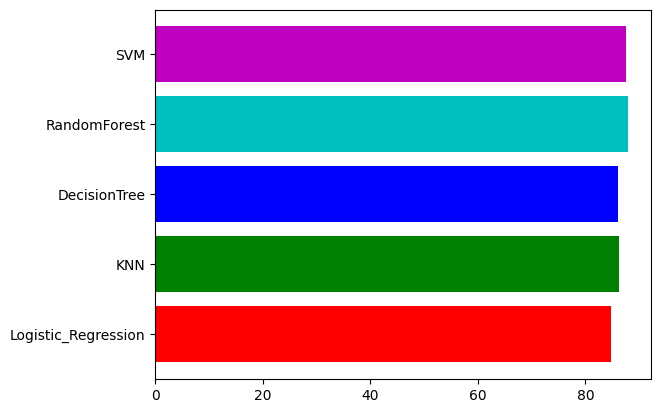

In [157]:
plt.barh(data['model'],data['score'],color=['r','g','b','c','m'])

In [158]:
import joblib

joblib.dump(rf, "abnormal_usage_model.pkl")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']